## Lasso Regression Formula

The objective function of Lasso Regression is:

$$
\min_{w} \left( \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j| \right)
$$

Where:

- $y_i$ = actual value  
- $\hat{y}_i$ = predicted value  
- $w_j$ = model coefficients  
- $\lambda$ = regularization parameter  
- $n$ = number of samples  
- $p$ = number of features  

In compact matrix form:

$$
\min_{w} \left( \|y - Xw\|_2^2 + \lambda \|w\|_1 \right)
$$

$$
L = \frac{1}{n} \sum (y - \hat{y})^2 + \lambda \sum |w|
$$

## Lasso Loss Function (Basic Form)

$$
L = \text{MSE} + \lambda \|w\|_1
$$

Where:

- $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
- $\lambda$ = regularization strength
- $\|w\|_1 = \sum_{j=1}^{p} |w_j|$

## code demo

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

[28.61878445]
-2.5662817706029424


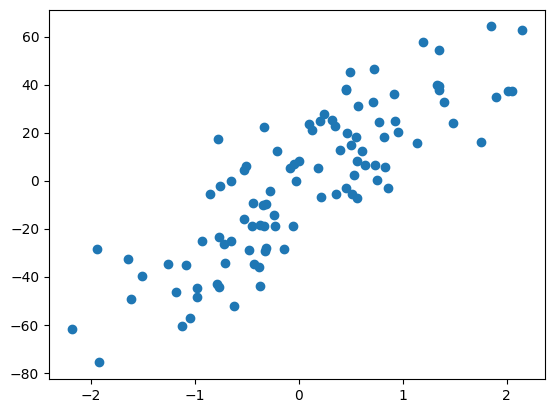

In [17]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

##### polynomial regression

In [18]:
np.random.seed(42)

m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1**2 - 2 * x1 + 3 + np.random.randn(m, 1)

# Sort once for smooth plotting
sort_idx = np.argsort(x1[:, 0])
x1_sorted = x1[sort_idx]

In [19]:
def get_preds_lasso(X, y, alpha):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=16, include_bias=False)),
        ('scaler', StandardScaler()),  # Important for Lasso
        ('lasso', Lasso(alpha=alpha, max_iter=10000))
    ])
    model.fit(X, y.ravel())
    return model.predict(x1_sorted)

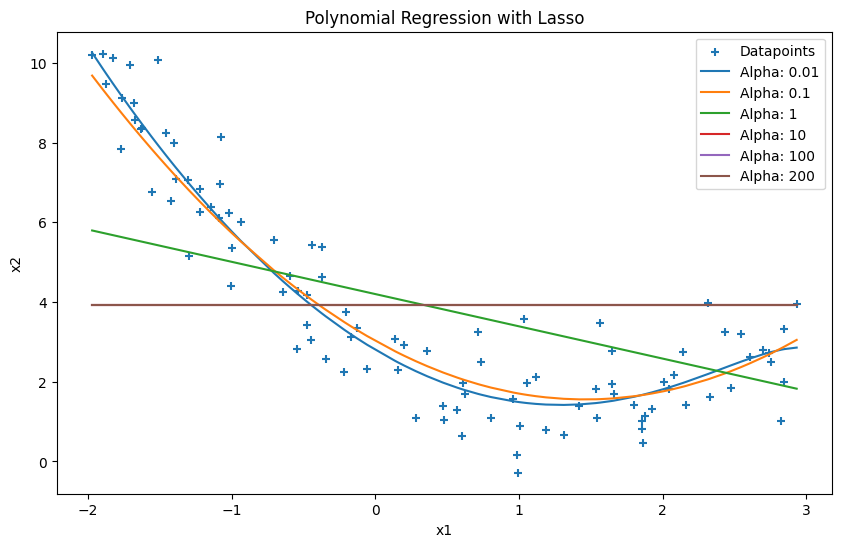

In [20]:
alphas = [0.01, 0.1, 1, 10, 100, 200]

plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, marker='+', label='Datapoints')

for alpha in alphas:
    preds = get_preds_lasso(x1, x2, alpha)
    plt.plot(x1_sorted, preds, label=f'Alpha: {alpha}')

plt.legend()
plt.title("Polynomial Regression with Lasso")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Polynomial Regression & Regularization Notes

### 🔹 High-Dimensional Polynomial Regression

When working with high-dimensional data:

- Polynomial features increase rapidly.
- Model becomes highly flexible.
- Risk of **overfitting** increases.
- Model may start fitting noise instead of real patterns.

---

## 🔹 Ridge Regression (L2 Regularization)

Loss Function:

$$
L = MSE + \lambda \sum_{j=1}^{p} w_j^2
$$

**Key Points:**

- Coefficients shrink toward zero.
- Coefficients **never become exactly zero**.
- All features remain in the model.
- Reduces variance.
- Useful when many features contribute small effects.
- Does **not perform feature selection**.

---

## 🔹 Lasso Regression (L1 Regularization)

Loss Function:

$$
L = MSE + \lambda \sum_{j=1}^{p} |w_j|
$$

**Key Points:**

- Coefficients shrink toward zero.
- Less important coefficients become **exactly zero**.
- Performs automatic **feature selection**.
- Produces a **sparse and interpretable model**.
- Helps reduce overfitting in high-dimensional data.

---

## 🔹 Key Difference

| Ridge | Lasso |
|-------|--------|
| Shrinks coefficients | Shrinks + Eliminates coefficients |
| Keeps all features | Removes less important features |
| No feature selection | Performs feature selection |

---

## 🔹 Important Insight

If features are highly correlated:

- Ridge distributes weights across correlated features.
- Lasso may randomly select one feature and drop others.

👉 In such cases, **Elastic Net (L1 + L2)** is often preferred.

| Ridge                | Lasso                   |
| -------------------- | ----------------------- |
| Shrinks coefficients | Shrinks coefficients    |
| Never exactly zero   | Can become exactly zero |
| No feature selection | Yes, feature selection  |


## 1) how are coefficients affected?

In [21]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [22]:
import numpy as np
import pandas as pd

In [23]:
data = load_diabetes()

X = data.data
y = data.target

feature_names = data.feature_names

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
alphas = [0.01, 0.1, 1, 10]  # removed 0
coefs = []
r2_scores = []

for alpha in alphas:
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, max_iter=10000))
    ])
    
    model.fit(X_train, y_train)
    
    # Extract coefficients from Lasso step
    lasso_model = model.named_steps['lasso']
    coefs.append(lasso_model.coef_)
    
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

In [26]:
coef_df = pd.DataFrame(coefs, columns=feature_names, index=alphas)
coef_df["R2 Score"] = r2_scores

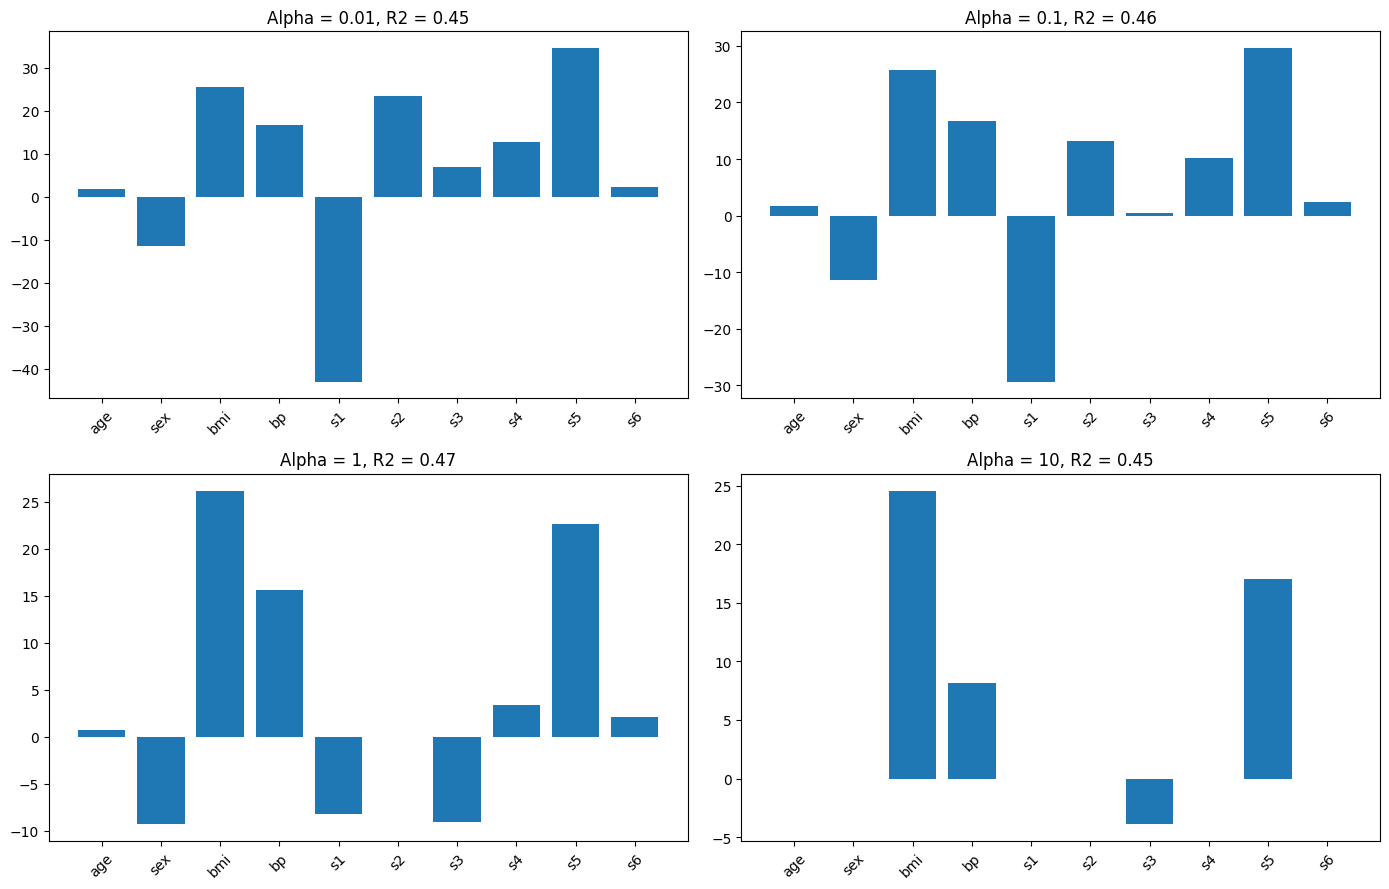

In [27]:
alphas = [0.01, 0.1, 1, 10] 

plt.figure(figsize=(14, 9))

for i, alpha in enumerate(alphas):
    plt.subplot(2, 2, i + 1)
    
    plt.bar(data.feature_names, coefs[i])
    plt.xticks(rotation=45)
    
    plt.title(f'Alpha = {alpha}, R2 = {round(r2_scores[i], 2)}')

plt.tight_layout()
plt.show()

## 2. Higher Coefficients are affected more

In [28]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

coefs = []

for alpha in alphas:
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, max_iter=10000))
    ])
    
    model.fit(X_train, y_train)
    
    lasso_model = model.named_steps['lasso']
    coefs.append(lasso_model.coef_)

In [29]:
coef_df = pd.DataFrame(coefs, columns=data.feature_names, index=alphas)

coef_df.index.name = "alpha"

coef_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0001,1.753735,-11.511614,25.607339,16.828687,-44.433746,24.629573,7.669840,13.135879,35.155659,2.351406
0.0010,1.753526,-11.509854,25.609300,16.827024,-44.297759,24.527154,7.605603,13.109731,35.105838,2.351786
0.0100,1.751433,-11.492261,25.628901,16.810399,-42.938074,23.503102,6.963310,12.848283,34.607699,2.355582
0.1000,1.730451,-11.316359,25.824627,16.644252,-29.358412,13.275844,0.547948,10.236168,29.632826,2.393475
1.0000,0.687032,-9.297519,26.219225,15.657314,-8.228172,-0.000000,-9.024087,3.420861,22.636465,2.098647
10.0000,0.000000,-0.000000,24.582549,8.114815,-0.000000,-0.000000,-3.890621,0.000000,17.032649,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


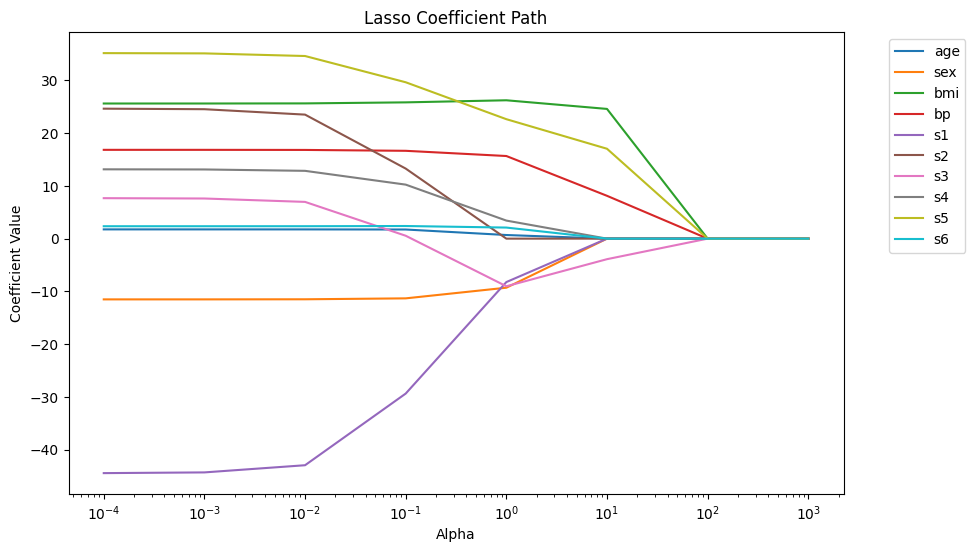

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for col in coef_df.columns:
    plt.plot(coef_df.index, coef_df[col], label=col)

plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficient Path")
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

## 3) Impact on Bias and Variance 

##### Discussion

| λ Value                          | Model Complexity | Bias     | Variance |
| -------------------------------- | ---------------- | -------- | -------- |
| λ = 0 (Normal Linear Regression) | High             | Low      | High     |
| Small λ                          | Medium           | Slight ↑ | Slight ↓ |
| Large λ                          | Very Simple      | High     | Low      |


In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
# Generate nonlinear dataset
np.random.seed(42)
m = 200
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X**2 - 2 * X + 3 + np.random.randn(m, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

alphas = np.logspace(-3, 2, 50)

In [35]:
train_errors = []
test_errors = []
for alpha in alphas:
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=15)),
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, max_iter=10000))
    ])
    
    model.fit(X_train, y_train.ravel())
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

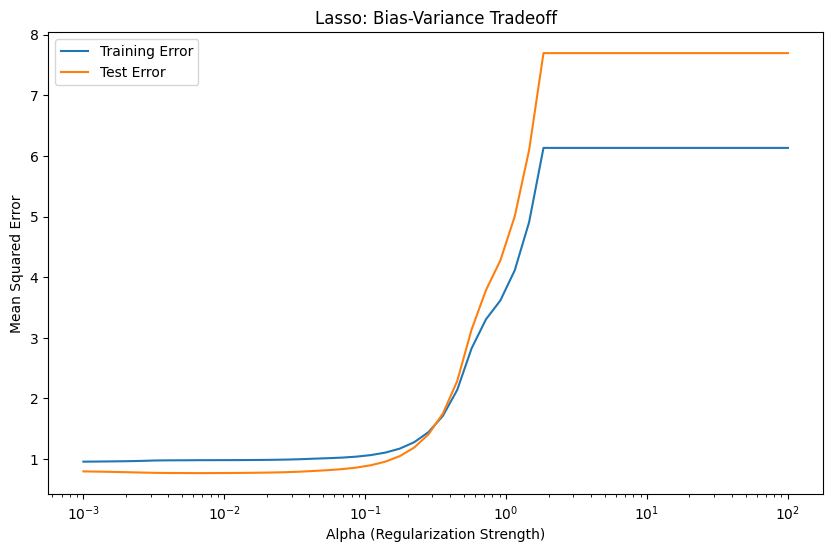

In [36]:
plt.figure(figsize=(10,6))
plt.plot(alphas, train_errors, label="Training Error")
plt.plot(alphas, test_errors, label="Test Error")
plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Mean Squared Error")
plt.title("Lasso: Bias-Variance Tradeoff")
plt.legend()
plt.show()

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso

In [58]:
# True function (noise-free)
def true_function(X):
    return 0.7 * X**2 - 2 * X + 3

np.random.seed(0)

# Fixed test set
X_test = np.linspace(-2, 3, 200).reshape(-1, 1)
y_true = true_function(X_test)

alphas = np.logspace(-4, 2, 30)

bias_values = []
variance_values = []

n_datasets = 50   # number of different training datasets

In [59]:
for alpha in alphas:
    
    all_predictions = []
    
    for _ in range(n_datasets):
        
        # Small dataset → high variance
        X_train = 5 * np.random.rand(30, 1) - 2
        y_train = true_function(X_train) + np.random.randn(30, 1)
        
        model = Pipeline([
            ('poly', PolynomialFeatures(degree=25, include_bias=False)),
            ('scaler', StandardScaler()),
            ('lasso', Lasso(alpha=alpha, max_iter=20000))
        ])
        
        model.fit(X_train, y_train.ravel())
        preds = model.predict(X_test)
        all_predictions.append(preds)
    
    all_predictions = np.array(all_predictions)
    
    mean_prediction = np.mean(all_predictions, axis=0)
    
    # Bias²
    bias = np.mean((mean_prediction - y_true.ravel())**2)
    
    # Variance
    variance = np.mean(np.var(all_predictions, axis=0))
    
    bias_values.append(bias)
    variance_values.append(variance)

print("Alpha count:", len(alphas))
print("Bias count :", len(bias_values))

C:\Users\diwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+01, tolerance: 1.824e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\diwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.872e+00, tolerance: 2.101e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\diwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Alpha count: 30
Bias count : 30


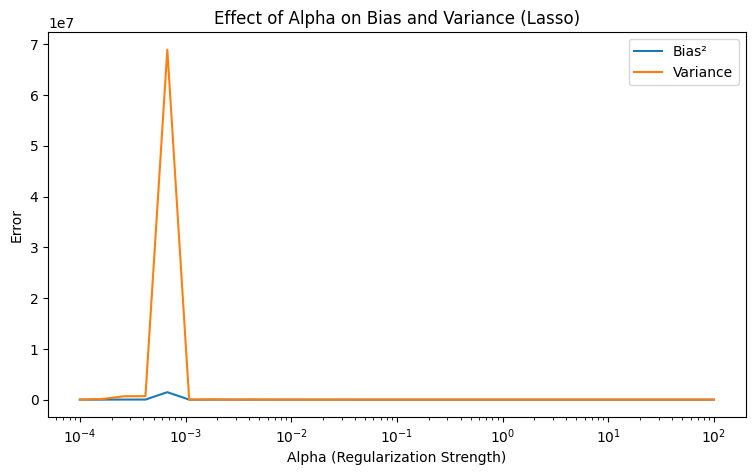

In [60]:
# Plot
plt.figure(figsize=(9,5))
plt.plot(alphas, bias_values, label="Bias²")
plt.plot(alphas, variance_values, label="Variance")

plt.xscale("log")
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Error")
plt.title("Effect of Alpha on Bias and Variance (Lasso)")
plt.legend()
plt.show()

 - Model becomes numerically unstable
 - Tiny data change → huge prediction change
 - Variance explodes (~10⁷ in your plot)

> That spike is real overfitting.

## 4 ) Effect of Regularization on Loss Regression


In Linear Regression, the objective is to minimize the Residual Sum of Squares (RSS):

Loss = Σ (y - ŷ)²

Lasso Regression modifies this by adding an L1 regularization term:

Loss = Σ (y - ŷ)² + λ Σ |wᵢ|

Here:
- The first term measures data fitting error.
- The second term penalizes model complexity.
- λ (alpha) controls the strength of regularization.

---

#### How Alpha (λ) Affects the Loss

When alpha increases:

- The penalty term becomes stronger.
- Coefficients shrink toward zero.
- Some coefficients become exactly zero.
- Model complexity decreases.

This creates a tradeoff between:
- Data fitting (low RSS)
- Model simplicity (small weights)

---

#### Effect on Training Loss

As alpha increases:

- Training RSS increases.
- Model is restricted.
- Underfitting may occur for large alpha.

Small alpha → Low training loss → Complex model  
Large alpha → High training loss → Simple model  

---

#### Effect on Total Lasso Loss

The total objective (RSS + L1 penalty):

- May initially improve generalization.
- Eventually increases when model becomes too simple.
- Balances bias and variance.

---

#### Key Insight

Regularization does NOT try to minimize training error alone.

It minimizes:

Data Error + Model Complexity

This prevents overfitting and improves generalization.

---

#### Final Conclusion

Increasing alpha:

- Increases training loss
- Reduces model complexity
- Increases bias
- Decreases variance

Lasso achieves this by shrinking coefficients and performing automatic feature selection.

In [61]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

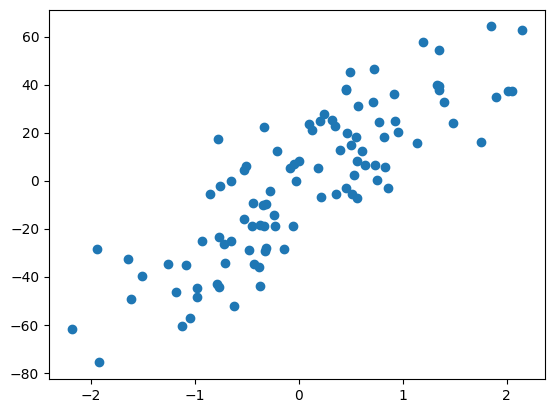

In [62]:
X, y = make_regression(n_samples=100, n_features=1,
                       n_informative=1, noise=20,
                       random_state=13)

plt.scatter(X, y)

In [63]:
reg = LinearRegression()
reg.fit(X, y)

b = reg.intercept_

In [64]:
# loss function
def cal_loss(m, alpha):
    y_pred = m * X.ravel() + b
    return np.sum((y - y_pred) ** 2) + alpha * abs(m)

In [65]:
m_values = np.linspace(-45, 100, 200)

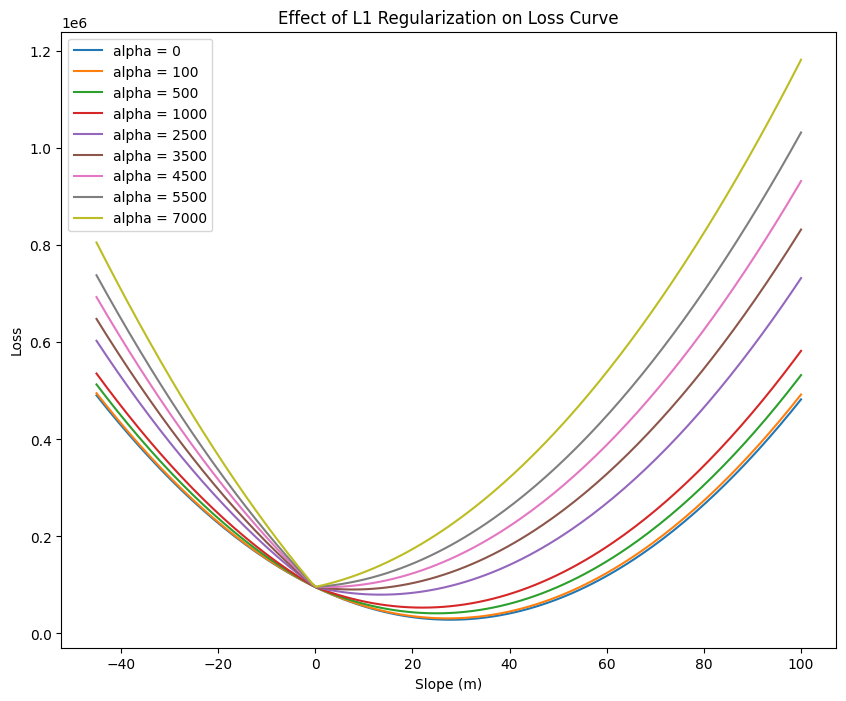

In [68]:
plt.figure(figsize=(10,8))

for alpha in [0, 100, 500, 1000, 2500, 3500, 4500, 5500,7000]:
    loss = []
    for m in m_values:
        loss.append(cal_loss(m, alpha))
    plt.plot(m_values, loss, label=f'alpha = {alpha}')

plt.legend()
plt.xlabel('Slope (m)')
plt.ylabel('Loss')
plt.title('Effect of L1 Regularization on Loss Curve')
plt.show()

In [75]:
# Get default color cycle
colors = plt.rcParams['axes.prop_cycle']
colors

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'
